In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import read_table
from ctapipe.visualization import CameraDisplay
from ctapipe_io_lst import load_camera_geometry
from ctapipe.coordinates import EngineeringCameraFrame
from lstchain.io import get_dataset_keys

from ctapipe_io_lst.constants import (
    N_GAINS, N_PIXELS, N_MODULES, N_SAMPLES, LOW_GAIN, HIGH_GAIN,
    N_PIXELS_MODULE, N_CAPACITORS_PIXEL, N_CAPACITORS_CHANNEL
)


<font size="4"> Basic constants of the LST camera are:</font>

In [8]:
print(f"N_GAINS {N_GAINS}") 
print(f"N_PIXELS {N_PIXELS}")
print(f"N_MODULES {N_MODULES}")
print(f"N_SAMPLES {N_SAMPLES}")
print(f"LOW_GAIN {LOW_GAIN}")
print(f"HIGH_GAIN {HIGH_GAIN}")
print(f"N_PIXELS_MODULE {N_PIXELS_MODULE}")
print(f"N_CAPACITORS_PIXEL {N_CAPACITORS_PIXEL}")
print(f"N_CAPACITORS_CHANNEL {N_CAPACITORS_CHANNEL}")

N_GAINS 2
N_PIXELS 1855
N_MODULES 265
N_SAMPLES 40
LOW_GAIN 1
HIGH_GAIN 0
N_PIXELS_MODULE 7
N_CAPACITORS_PIXEL 4096
N_CAPACITORS_CHANNEL 1024


<font size="4">Read the baseline file of date 20210915: <br>
<ul>    
<li> data in  
[data_tree_base_dir]/monitoring/PixelCalibration/LevelA/drs4_baseline/20210915/pro/drs4_pedestal.Run06307.0000.h5    
<li> you can check the control plots in 
[data_tree_base_dir]/monitoring/PixelCalibration/LevelA/drs4_baseline/20210915/pro/log/drs4_pedestal.Run06307.0000.pdf
</ul>    
</font>


In [9]:
# change the data tree root dir with your local tree
file_name="/fefs/aswg/data/real/monitoring/PixelCalibration/LevelA/drs4_baseline/20210915/pro/drs4_pedestal.Run06307.0000.h5"
tel_id=1 

# find the keys' name
dataset_keys=get_dataset_keys(file_name)
print(f"file keys: {dataset_keys}")

# read the table
table = read_table(file_name, dataset_keys[0])


file keys: ['/r1/monitoring/drs4_baseline/tel_001']


In [10]:
# look at the table
table

"baseline_mean [2,1855,4096]","baseline_std [2,1855,4096]","baseline_counts [2,1855,4096]","spike_height [2,1855,3]"
float32,float32,int32,float32
400.0 .. 400.2,8.2 .. 3.3,143 .. 140,49.0 .. 9.4


<font size="5">Exercise: <br>
    
<font size="4"> Plot the baseline values as function of the capacitors for pixel 0 and the two gain channels<br>

In [11]:
# consider the baseline data
baseline_data = table[0]['baseline_mean']
baseline_data.shape

(2, 1855, 4096)

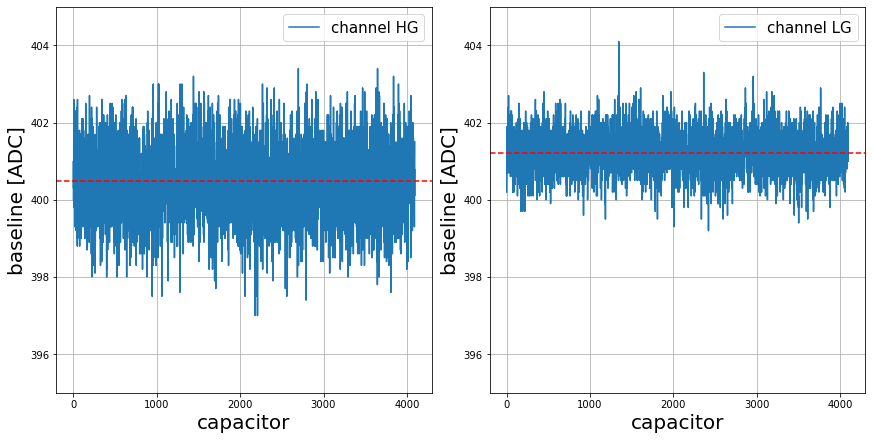

In [12]:
# plot the estimated baseline values for a given pixel
pixel=0
channel=["HG","LG"]

fig, ax = plt.subplots(1, 2, figsize=(12,6),constrained_layout=True)
for chan in np.arange(2):
    label=f"channel {channel[chan]}"
    ax[chan].grid(True)
    ax[chan].set_ylim(395,405)
    ped_median=np.median(baseline_data[chan,pixel,:])
    ax[chan].plot(baseline_data[chan,pixel,:],label=label)
    ax[chan].axhline(ped_median, color='red',linestyle="--")
    ax[chan].set_ylabel(f'baseline [ADC]',fontsize=20) 
    ax[chan].set_xlabel(f'capacitor',fontsize=20) 
   
    ax[chan].legend(prop={'size':15})


<font size="5">Exercises  : <br>

<ol>
<li> <font size="4"> Plot the counts as function of the capacitors for pixel 0 for the two gain channels<br>
<li> <font size="4"> Plot the height of the 3 types of spikes in a single histogram for each gain channel     
</ol>    
</font>
<br>
<font size="4">  Look at the notebook read_pedestal_files_exercise_solutions.ipynb for the solution 